# Acoustics in Python with Numpy, Scipy and Pylab/Matplotlib

*Jesse Dirisu*

In [1]:
import numpy as np
import pylab as plt
from matplotlib import mlab, style
import scipy as sc
from scipy.io.wavfile import read, write

style.use('bmh')

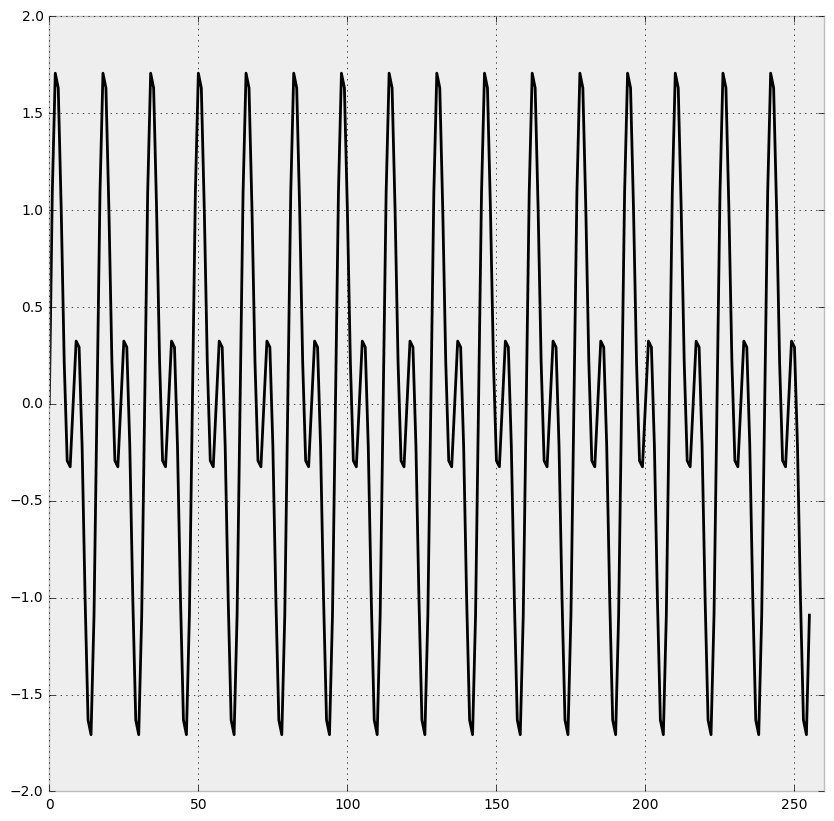

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
        117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
        126.,  127.,

In [2]:
plt.figure(figsize=(10, 10), dpi=90)
x = np.arange(256.0)
sin1 = np.sin(2*np.pi*(1250.0/10000.0)*x)
sin2 = np.sin(2*np.pi*(625.0/10000.0)*x)
sig = sin1 + sin2
plt.plot(sig, 'k')
plt.xlim(0, 260)
plt.show()
x

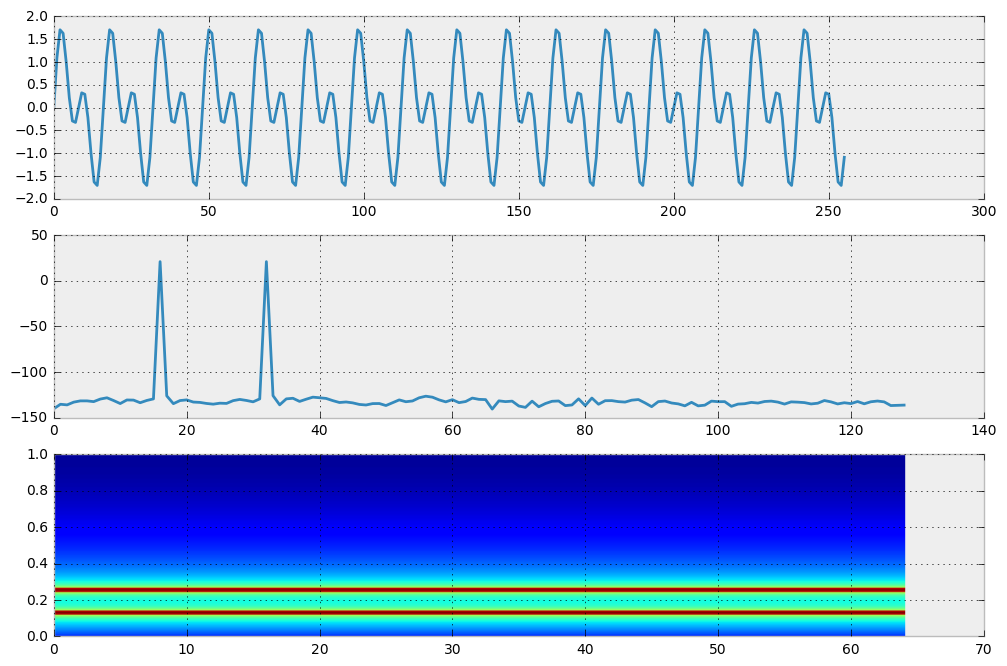

In [3]:
def wave_plotter(sig):
    from os import path
    if path.exists(sig):
        aud = read(sig)[1]
        ff = np.fft.rfft(aud)
        ff = abs(ff)
        ff = 10*np.log10(ff)
        plt.figure(figsize=(12, 8), dpi=90)
        plt.subplot(3,1,1)
        plt.plot(aud)
        plt.subplot(3,1,2)
        plt.plot(ff)
        plt.subplot(3,1,3)
        plt.specgram(aud)
        plt.show()
    else:
        print('File Does not exist')
        
wave_plotter('out.wav')

def plot_snd(x):
    plt.figure(figsize=(10, 10), dpi=90)
    plt.plot(x)
    plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


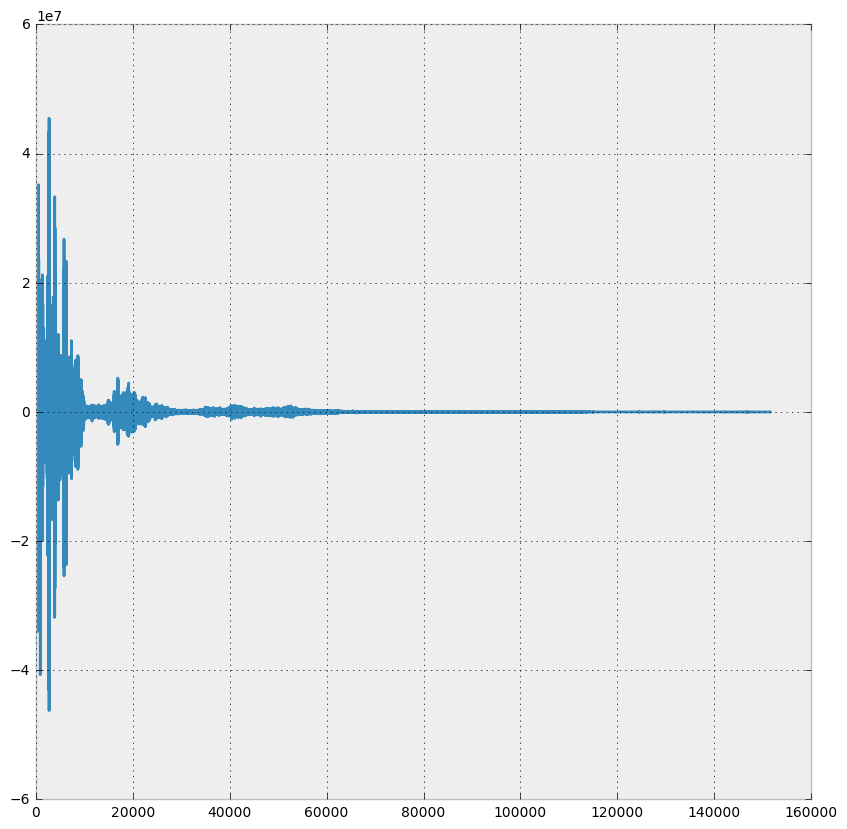

In [4]:
sam, aud = read('sound.wav')

fourier = np.fft.rfft(aud)
plot_snd(fourier)

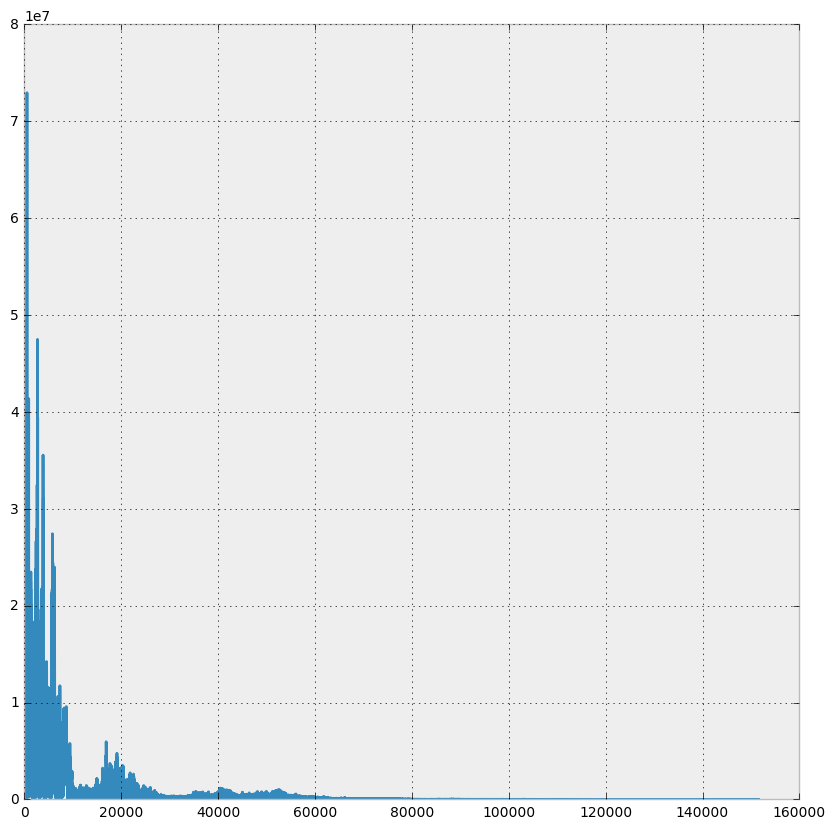

In [5]:
plot_snd(abs(fourier))

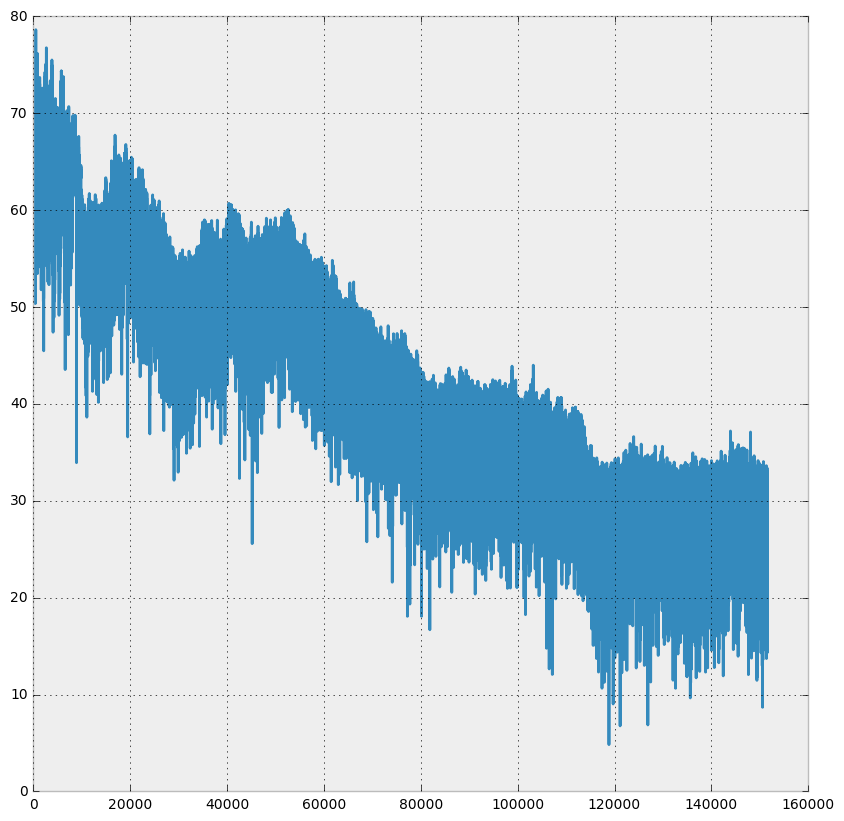

In [6]:
# the standard way of ascertaining the fft of a sound is

sample, audio = read('sound.wav')
fft_ = np.fft.rfft(audio)
fft_ = abs(fft_)
fft_ = 10*np.log10(fft_)

plot_snd(fft_)

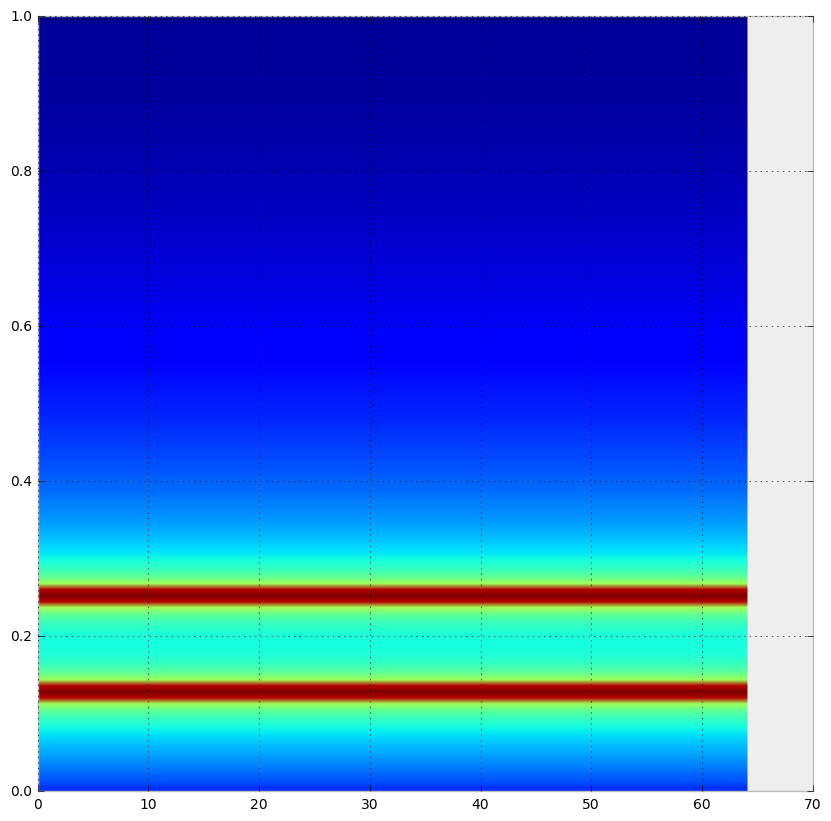

In [7]:
plt.figure(figsize=(10, 10), dpi=90)
spect = plt.specgram(sig)
plt.show()
#plt.clf()

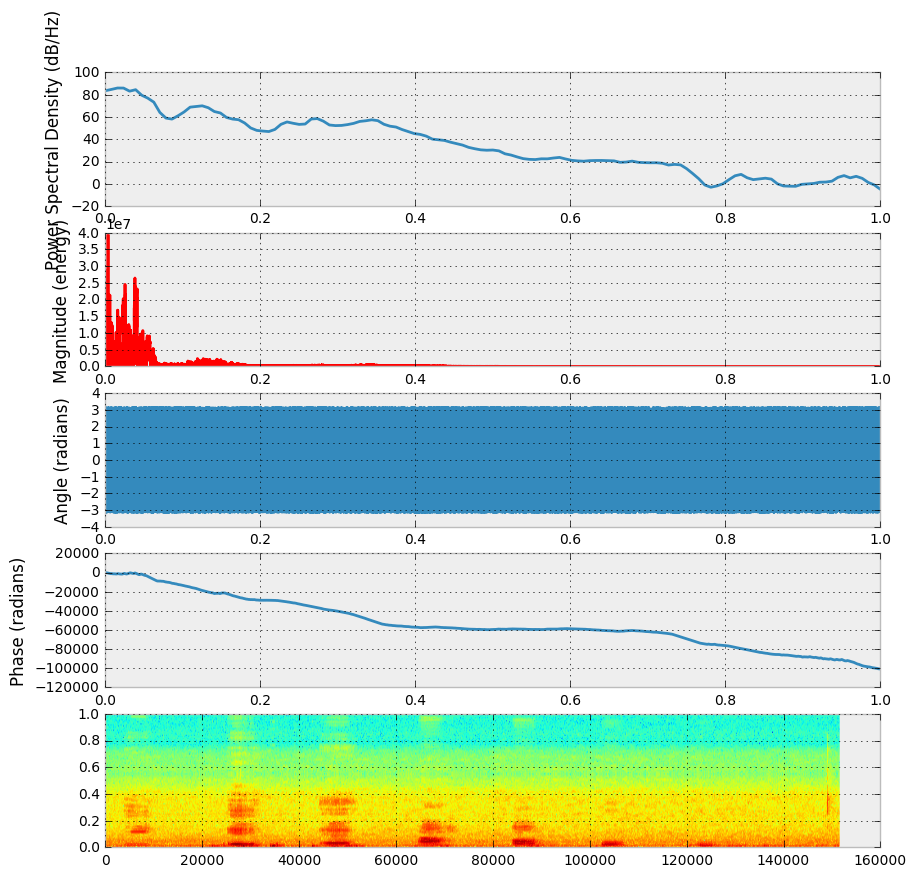

In [13]:
plt.figure(figsize=(10, 10),dpi=90)
plt.subplot(5,1,1)
spect = plt.psd(aud)#, detrend=mlab.detrend_none, window=mlab.window_hanning
plt.subplot(5,1,2)
spect = plt.magnitude_spectrum(aud, color='r')#, detrend=mlab.detrend_none, window=mlab.window_hanning
plt.subplot(5,1,3)
spect = plt.angle_spectrum(aud)#, detrend=mlab.detrend_none, window=mlab.window_hanning
plt.subplot(5,1,4)
spect = plt.phase_spectrum(aud)#, detrend=mlab.detrend_none, window=mlab.window_hanning
plt.subplot(5,1,5)
spect = plt.specgram(aud)#, detrend=mlab.detrend_none, window=mlab.window_hanning
plt.savefig("Spect.png")
plt.show()

In [31]:
# we can also write to wav file
def make_wav_file(data, outfile, sf):
    write(outfile, sf, data)
    
make_wav_file(sig, 'out.wav', 44100)

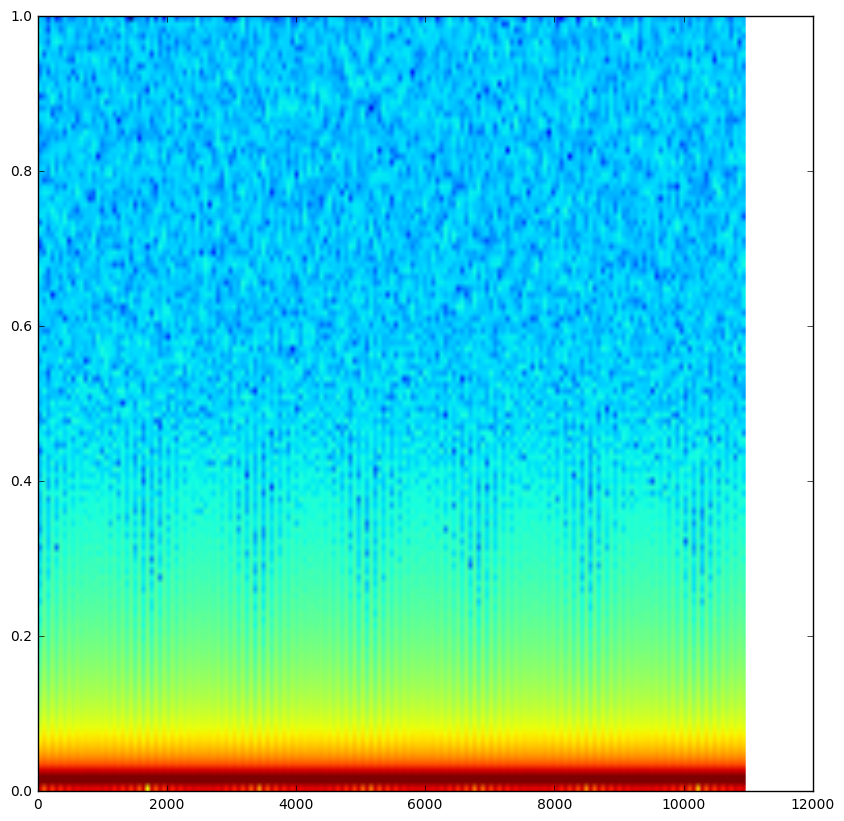

In [34]:
test = read('test.wav')[1]
plt.figure(figsize=(10, 10), dpi=90)
plt.specgram(test)
plt.show()

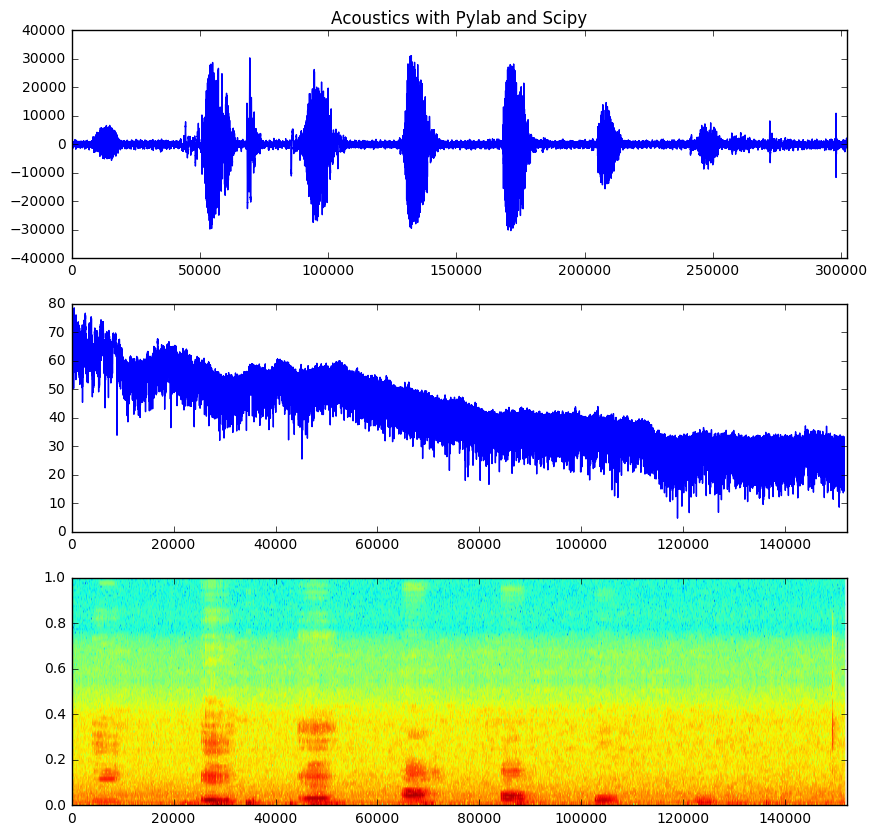

In [37]:
plt.figure(figsize=(10, 10), dpi=90)
plt.subplot(3,1,1)
plt.plot(aud)
plt.title('Acoustics with Pylab and Scipy')
plt.xlim(0,302000)
plt.subplot(3,1,3)
plt.specgram(aud)
plt.xlim(0,152000)
plt.subplot(3,1,2)
plt.plot(fft_)
plt.xlim(0,152000)
plt.savefig('vowels.jpg')
plt.show()